# Pets in Seattle: A comparison of python histogram libraries

## Import necessary packages

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from names import get_counts, get_dogs_by_breed

## Import Data

In [3]:
pets_df = pd.read_csv('data/Seattle_Pet_Licenses.csv')

In [4]:
pets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51754 entries, 0 to 51753
Data columns (total 7 columns):
License Issue Date    51754 non-null object
License Number        51754 non-null object
Animal's Name         51460 non-null object
Species               51754 non-null object
Primary Breed         51754 non-null object
Secondary Breed       24912 non-null object
ZIP Code              51344 non-null object
dtypes: object(7)
memory usage: 2.8+ MB


In [5]:
pets_df['Species'].value_counts()

Dog     34882
Cat     16829
Goat       38
Pig         5
Name: Species, dtype: int64

In [6]:
pets_df

,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code
0,April 19 2003,200097,Tinkerdelle,Cat,Domestic Shorthair,NaN,98116
1,February 07 2006,75432,Pepper,Cat,Manx,Mix,98103
2,May 21 2014,727943,Ashley,Cat,Domestic Shorthair,NaN,98115
3,May 08 2015,833836,Lulu,Cat,LaPerm,NaN,98136
4,May 13 2015,361031,My Boy,Cat,Russian Blue,NaN,98121
5,July 21 2015,203480,Rocket,Cat,Domestic Shorthair,NaN,98144
6,September 30 2015,574027,Calypso,Cat,Domestic Shorthair,NaN,98106
7,November 13 2015,579007,Blue,Cat,American Shorthair,Siamese,98115
8,November 13 2015,579087,Kashi,Cat,American Shorthair,Mix,98115
9,November 17 2015,75175,Charlie,Cat,Persian,NaN,98115


## Names

### Cats

In [7]:
cats_df = pets_df.loc[pets_df['Species'] == 'Cat']

In [8]:
cat_names = get_counts(cats_df, "Animal's Name")
cat_names.columns = ['name', 'count']

In [9]:
cat_t50 = cat_names.iloc[0:50]

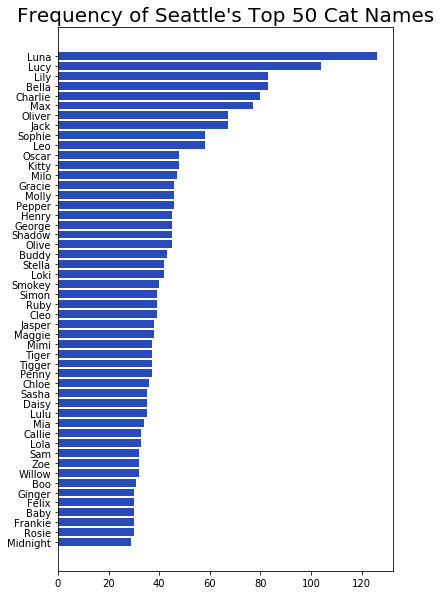

In [67]:
fig, ax = plt.subplots(figsize=(6,10))
plt.barh(cat_t50['name'], cat_t50['count'], color='#294AB9')
ax.set_title("Frequency of Seattle's Top 50 Cat Names", fontsize=20)
ax.invert_yaxis();

### Dogs

In [11]:
dogs_df = pets_df.loc[pets_df['Species'] == 'Dog']

In [12]:
dog_names = get_counts(dogs_df, "Animal's Name")
dog_names.columns = ['name', 'count']

Check for dogs with my dog's name

In [13]:
dogs_df.loc[dogs_df["Animal's Name"]=='Beckham']

,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code
35469,October 26 2017,584724,Beckham,Dog,"Retriever, Golden",NaN,98118
49284,May 09 2019,279065,Beckham,Dog,"Chihuahua, Short Coat",NaN,98125


back to graphing

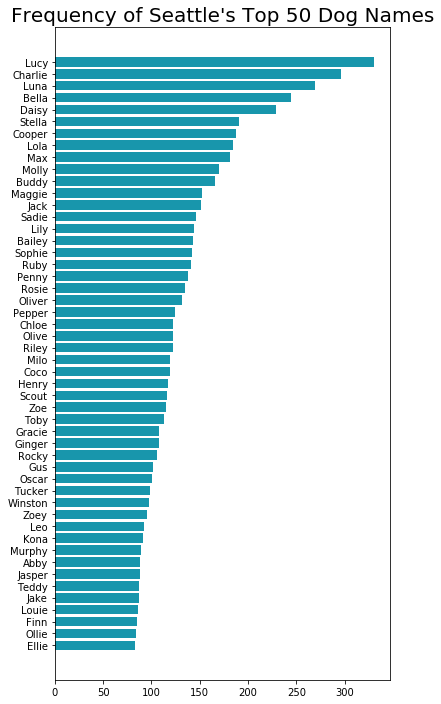

In [68]:
dog_t50 = dog_names.iloc[0:50]

fig, ax = plt.subplots(figsize=(6,12))
plt.barh(dog_t50['name'], dog_t50['count'], color='#1896ac')
ax.invert_yaxis()
ax.set_title("Frequency of Seattle's Top 50 Dog Names", fontsize=20);

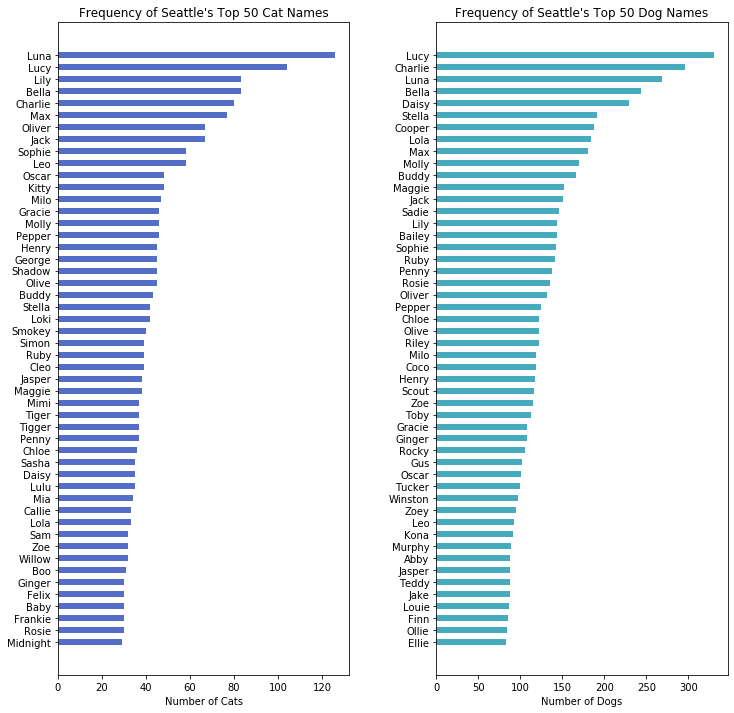

In [88]:
# combined figure with dog and cat name histograms for blog:
fig, axes = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(wspace=.3)

axes[0].barh(cat_t50['name'], cat_t50['count'], .5, color='#294AB9', align='center', alpha=0.8)
axes[0].invert_yaxis()
axes[0].set_title("Frequency of Seattle's Top 50 Cat Names", fontsize=12)
axes[0].set_xlabel("Number of Cats")

axes[1].barh(dog_t50['name'], dog_t50['count'], .5, color='#1896ac', align='center', alpha=0.8)
axes[1].invert_yaxis()
axes[1].set_title("Frequency of Seattle's Top 50 Dog Names", fontsize=12)
axes[1].set_xlabel("Number of Dogs")

plt.savefig('images/cat_dog_name_freq.png');

## Overlap in top 50 names for cats and dogs

In [16]:
overlap_names = [name for name in dog_t50["name"] if name in list(cat_t50["name"])]

In [17]:
overlap_names

['Lucy',
 'Charlie',
 'Luna',
 'Bella',
 'Daisy',
 'Stella',
 'Lola',
 'Max',
 'Molly',
 'Buddy',
 'Maggie',
 'Jack',
 'Lily',
 'Sophie',
 'Ruby',
 'Penny',
 'Rosie',
 'Oliver',
 'Pepper',
 'Chloe',
 'Olive',
 'Milo',
 'Henry',
 'Zoe',
 'Gracie',
 'Ginger',
 'Oscar',
 'Leo',
 'Jasper']

In [18]:
len(overlap_names)

29

In [19]:
cat_only_names = [name for name in cat_t50["name"] if name not in list(dog_t50["name"])]

In [20]:
dog_only_names = [name for name in dog_t50["name"] if name not in list(cat_t50["name"])]

In [21]:
cat_only_names

['Kitty',
 'George',
 'Shadow',
 'Loki',
 'Smokey',
 'Simon',
 'Cleo',
 'Mimi',
 'Tiger',
 'Tigger',
 'Sasha',
 'Lulu',
 'Mia',
 'Callie',
 'Sam',
 'Willow',
 'Boo',
 'Felix',
 'Baby',
 'Frankie',
 'Midnight']

In [22]:
dog_only_names

['Cooper',
 'Sadie',
 'Bailey',
 'Riley',
 'Coco',
 'Scout',
 'Toby',
 'Rocky',
 'Gus',
 'Tucker',
 'Winston',
 'Zoey',
 'Kona',
 'Murphy',
 'Abby',
 'Teddy',
 'Jake',
 'Louie',
 'Finn',
 'Ollie',
 'Ellie']

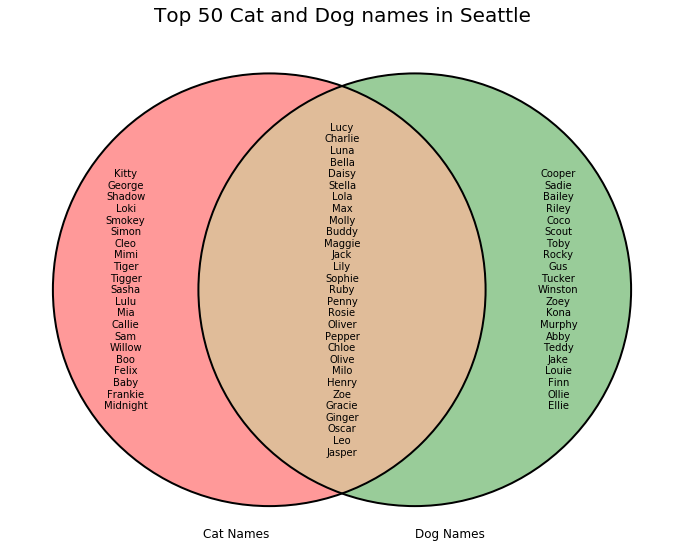

In [23]:
from matplotlib_venn import venn2, venn2_circles

fig, ax = plt.subplots(figsize = (12,10))
ax.set_title('Top 50 Cat and Dog names in Seattle', fontsize=20)
v = venn2([set(cat_t50["name"]), set(dog_t50["name"])], 
          set_labels=['Cat Names', 'Dog Names'])
v.get_label_by_id('10').set_text('\n'.join(cat_only_names))
v.get_label_by_id('01').set_text('\n'.join(dog_only_names))
v.get_label_by_id('11').set_text('\n'.join(overlap_names))
c = venn2_circles([set(cat_t50["name"]), set(dog_t50["name"])], 
                  linestyle='solid')
plt.savefig('images/name_venn.png')

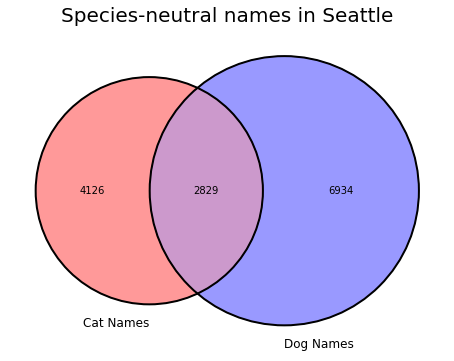

In [90]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from collections import OrderedDict

fig, ax = plt.subplots(figsize = (10,6))
ax.set_title('Species-neutral names in Seattle', fontsize=20)

v = venn2([set(cat_names["name"]), 
           set(dog_names["name"])], 
          set_labels=['Cat Names', 'Dog Names'])
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)

c = venn2_circles([set(cat_names["name"]), 
           set(dog_names["name"])], 
              linestyle='solid')
plt.savefig('images/species_neutral_names.png')

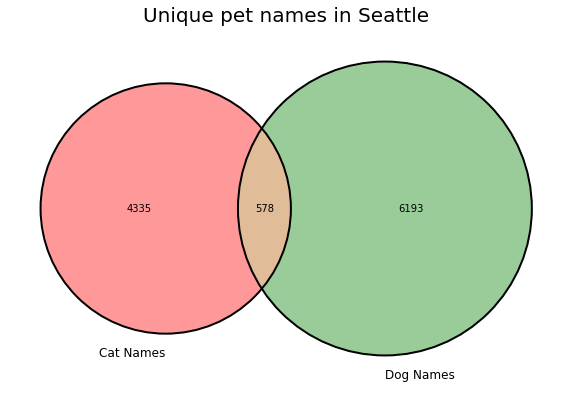

In [25]:
# Single species-instance names

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Unique pet names in Seattle', fontsize=20)

v = venn2([set(cat_names.loc[cat_names['count']==1,"name"]), 
           set(dog_names.loc[dog_names['count']==1, "name"])], 
          set_labels=['Cat Names', 'Dog Names'])
c = venn2_circles([set(cat_names.loc[cat_names['count']==1,"name"]), 
           set(dog_names.loc[dog_names['count']==1, "name"])], 
              linestyle='solid')

In [26]:
cat_names.loc[cat_names['count']==1]

,name,count
2042,Klotho (Kloey),1
2043,Nightcrawler,1
2044,Scratchy,1
2045,Gray Cat,1
2046,Alice Cooper,1
2047,David McFatty,1
2048,Zunino,1
2049,Osborne,1
2050,Gyzmo,1
2051,Schuster,1


In [27]:
dog_names.loc[dog_names['count']==1]

,name,count
2992,DeDe,1
2993,Pete Rose,1
2994,Phinnaeus Mortimer,1
2995,Peppi,1
2996,Honey Girl,1
2997,SAM Howdy,1
2998,Dakota Sanderson,1
2999,Minny,1
3000,Wulfenstein,1
3001,Brylie,1


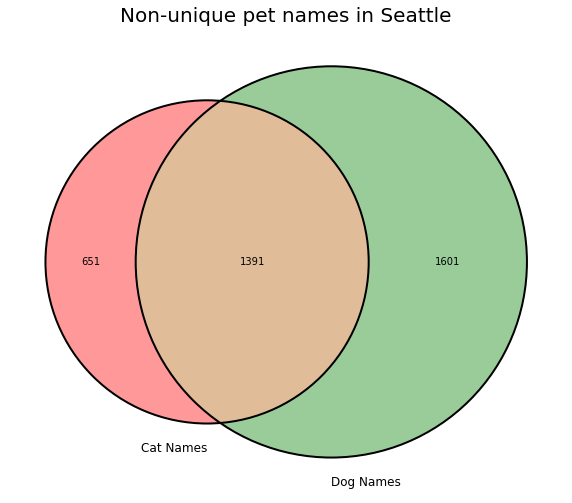

In [28]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Non-unique pet names in Seattle', fontsize=20)

v = venn2([set(cat_names.loc[cat_names['count']>1,"name"]), 
           set(dog_names.loc[dog_names['count']>1, "name"])], 
          set_labels=['Cat Names', 'Dog Names'])
c = venn2_circles([set(cat_names.loc[cat_names['count']>1,"name"]), 
           set(dog_names.loc[dog_names['count']>1, "name"])], 
              linestyle='solid')

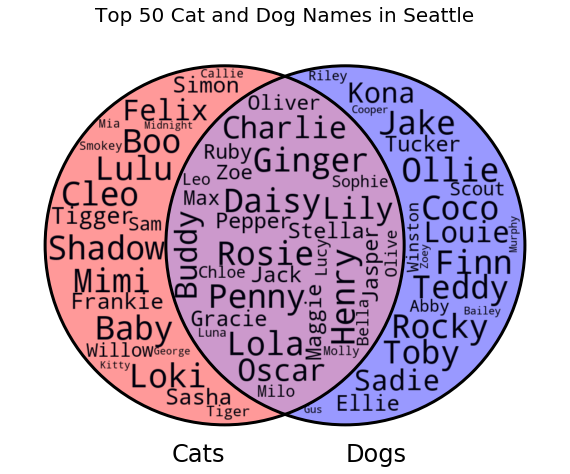

In [29]:
from matplotlib_venn_wordcloud import venn2_wordcloud

fig, ax = plt.subplots(figsize=(10,8))
v = venn2_wordcloud([set(cat_t50['name']), set(dog_t50['name'])], 
                ax=ax, set_labels=['Cats', 'Dogs'])

# add color
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)


ax.set_title('Top 50 Cat and Dog Names in Seattle', fontsize=20)
plt.savefig('images/wordcloud_names.png');

## Looking at Breeds

### Cats

In [30]:
cats_df['Primary Breed'].value_counts()

Domestic Shorthair       9819
Domestic Medium Hair     2030
Domestic Longhair        1317
American Shorthair        916
Siamese                   669
LaPerm                    315
Mix                       289
Maine Coon                276
Ragdoll                   139
Russian Blue              136
Siberian                   90
Persian                    82
Bengal                     72
Manx                       70
Abyssinian                 50
Bombay                     49
Norwegian Forest           48
Snowshoe                   46
Burmese                    45
Pixie-Bob                  42
British Shorthair          39
Himalayan                  38
Balinese                   26
Birman                     20
Scottish Fold              17
Devon Rex                  15
Tonkinese                  14
Exotic Shorthair           13
Turkish Van                13
Egyptian Mau               12
Sphynx                     11
European Shorthair         11
Oriental Shorthair         11
Ocicat    

In [31]:
cats_df['Secondary Breed'].value_counts()

Mix                      6372
Domestic Shorthair        138
Siamese                   121
Maine Coon                 79
Domestic Medium Hair       52
American Shorthair         50
Domestic Longhair          40
Russian Blue               22
Ragdoll                    20
Manx                       17
Snowshoe                   15
Abyssinian                 13
Bengal                     13
Norwegian Forest           10
Bombay                     10
Himalayan                   9
Ocicat                      8
Persian                     7
Tiffany                     6
British Shorthair           6
Burmese                     6
Siberian                    5
Egyptian Mau                4
Oriental Shorthair          4
York Chocolate              3
Exotic Shorthair            3
Balinese                    3
Sphynx                      2
Pixie-Bob                   2
Angora                      2
Colourpoint Shorthair       2
Desert Lynx                 2
RagaMuffin                  2
Chartreux 

### Dogs

In [32]:
dogs_df['Primary Breed'].value_counts()

Retriever, Labrador                  4636
Retriever, Golden                    1872
Chihuahua, Short Coat                1859
Terrier                              1001
German Shepherd                       964
Australian Shepherd                   874
Border Collie                         842
Poodle, Miniature                     835
Terrier, American Pit Bull            661
Australian Cattle Dog                 644
Shih Tzu                              614
Poodle, Standard                      578
Pug                                   542
Mix                                   529
Terrier, Yorkshire                    515
Beagle                                512
Havanese                              482
Schnauzer, Miniature                  473
Boxer                                 471
Pomeranian                            438
Bulldog, French                       431
Siberian Husky                        419
Shepherd                              387
Maltese                           

In [33]:
dogs_df['Secondary Breed'].value_counts()

Mix                                   7139
Poodle, Standard                      1149
Poodle, Miniature                      909
Retriever, Labrador                    884
Chihuahua, Short Coat                  423
Terrier                                401
Retriever, Golden                      355
Border Collie                          333
German Shepherd                        275
Australian Shepherd                    252
Australian Cattle Dog                  232
Beagle                                 227
Dachshund, Standard Smooth Haired      182
Boxer                                  181
Shepherd                               175
Terrier, American Pit Bull             153
Terrier, Jack Russell                  150
Maltese                                143
Pug                                    140
Bichon Frise                           136
Pomeranian                             132
Shih Tzu                               125
Hound                                  124
Siberian Hu

#### Looking for doodles

In [34]:
poodles = ['Poodle', 'Poodle, Miniature', 'Poodle, Standard', 'Poodle, Toy']
doodles_poodles = dogs_df.loc[(dogs_df['Primary Breed'].isin(poodles) 
             | dogs_df['Secondary Breed'].isin(poodles))]

In [35]:
doodles = doodles_poodles.dropna(subset=['Secondary Breed'])

In [36]:
doodles.loc[doodles['Primary Breed'].isin(poodles), 'non_poodle_breed'] = doodles.loc[doodles['Primary Breed'].isin(poodles), 'Secondary Breed']
doodles.loc[doodles['Secondary Breed'].isin(poodles), 'non_poodle_breed'] = doodles.loc[doodles['Secondary Breed'].isin(poodles), 'Primary Breed']

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://panda

In [37]:
doodles

,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code,non_poodle_breed
16874,December 02 2014,140940,Lulu,Dog,"Retriever, Golden","Poodle, Standard",98118,"Retriever, Golden"
16887,December 01 2015,585183,Stella,Dog,American Eskimo,"Poodle, Miniature",98112,American Eskimo
16905,January 02 2016,898726,Tommy,Dog,"Poodle, Miniature",Pomeranian,98116,Pomeranian
16911,February 26 2016,902891,Daisy,Dog,"Retriever, Golden","Poodle, Standard",98199,"Retriever, Golden"
16936,September 06 2016,585989,Davida,Dog,"Retriever, Labrador","Poodle, Standard",98107,"Retriever, Labrador"
16939,September 27 2016,S121723,Momo,Dog,"Retriever, Labrador","Poodle, Standard",98117,"Retriever, Labrador"
17017,May 03 2017,S101564,Penny,Dog,"Poodle, Miniature","Terrier, Fox, Smooth",98108,"Terrier, Fox, Smooth"
17029,May 24 2017,S130462,Ayla,Dog,"Poodle, Standard","Retriever, Labrador",98108,"Retriever, Labrador"
17048,June 19 2017,732409,Cinderella,Dog,"Poodle, Miniature",Mix,98126,Mix
17052,June 30 2017,728455,Pepper,Dog,"Dachshund, Standard Smooth Haired","Poodle, Miniature",98115,"Dachshund, Standard Smooth Haired"


In [38]:
doodles['non_poodle_breed'].value_counts()

Retriever, Labrador                 809
Retriever, Golden                   645
Mix                                 201
Spaniel, American Cocker            188
Maltese                             166
Schnauzer, Miniature                146
Bichon Frise                         80
Terrier, Yorkshire                   71
Retriever                            64
Shih Tzu                             60
Terrier                              58
Australian Shepherd                  58
Bernese Mountain Dog                 55
Spaniel, Cavalier King Charles       54
Chihuahua, Short Coat                35
Pomeranian                           31
Old English Sheepdog                 28
American Eskimo                      27
Havanese                             26
Lhasa Apso                           23
Spaniel, English Cocker              21
Terrier, Soft Coated Wheaten         18
Schnauzer, Standard                  15
Retriever, Curly Coated              14
Australian Shepherd, Miniature       12


In [39]:
doodles.shape

(3104, 8)

In [40]:
dogs_df.shape

(34882, 7)

In [41]:
doodles.shape[0]/dogs_df.shape[0]

0.08898572329568259

I want to make a venn diagram with the major crosses - poodles, "Retriever, Labrador", "Retriever, Golden", "Spaniel, American Cocker", "Maltese", "Schnauzer, Miniature"

In [42]:
doodles = doodles.reset_index()
doodles_poodles = doodles_poodles.reset_index()

In [43]:
doodles.head()

,index,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code,non_poodle_breed
0,16874,December 02 2014,140940,Lulu,Dog,"Retriever, Golden","Poodle, Standard",98118,"Retriever, Golden"
1,16887,December 01 2015,585183,Stella,Dog,American Eskimo,"Poodle, Miniature",98112,American Eskimo
2,16905,January 02 2016,898726,Tommy,Dog,"Poodle, Miniature",Pomeranian,98116,Pomeranian
3,16911,February 26 2016,902891,Daisy,Dog,"Retriever, Golden","Poodle, Standard",98199,"Retriever, Golden"
4,16936,September 06 2016,585989,Davida,Dog,"Retriever, Labrador","Poodle, Standard",98107,"Retriever, Labrador"


In [44]:
dogs_df = dogs_df.reset_index()

In [45]:
dogs_df.head()

,index,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code
0,16872,March 29 2011,141222,Jenkey,Dog,Australian Cattle Dog,Mix,98106
1,16873,August 25 2014,728371,Emma,Dog,Beagle,NaN,98102
2,16874,December 02 2014,140940,Lulu,Dog,"Retriever, Golden","Poodle, Standard",98118
3,16875,May 08 2015,731184,Ginger,Dog,"Chihuahua, Short Coat",NaN,98136
4,16876,August 05 2015,S102297,Frida,Dog,"Chihuahua, Short Coat",Mix,98117


In [46]:
poodle_dogs = get_dogs_by_breed(dogs_df, poodles)
labs = get_dogs_by_breed(dogs_df, ["Retriever, Labrador"])
goldens = get_dogs_by_breed(dogs_df, ["Retriever, Golden"])
cocker_spaniels = get_dogs_by_breed(dogs_df, ["Spaniel, American Cocker", "Spaniel, English Cocker"])
malteses = get_dogs_by_breed(dogs_df, ["Maltese"])
schnauzers = get_dogs_by_breed(dogs_df, ["Schnauzer, Miniature", "Schnauzer, Standard"])

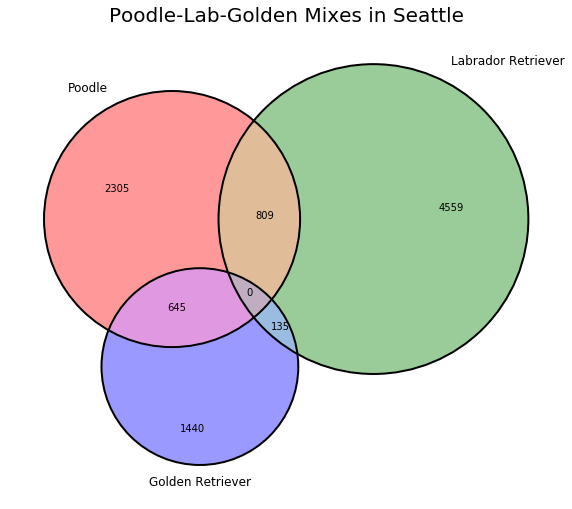

In [47]:
from matplotlib_venn import venn3, venn3_circles

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Poodle-Lab-Golden Mixes in Seattle', fontsize=20)

v = venn3([set(poodle_dogs), set(labs), set(goldens)], 
          set_labels=['Poodle', 'Labrador Retriever', 'Golden Retriever'], ax=ax)
c = venn3_circles([set(poodle_dogs), set(labs), set(goldens)], linestyle='solid', ax=ax)
plt.savefig('images/poodle_lab_golden.png')

In [48]:
809/(4559+809+135)

0.14701072142467744

In [49]:
doodle_dogs = [str(x) for x in doodles['index']]

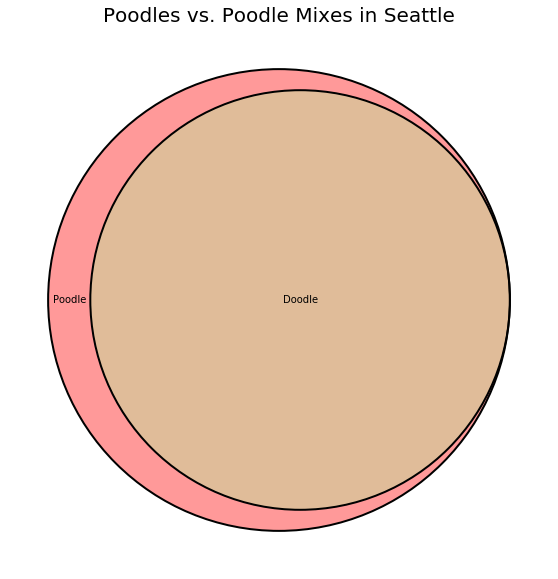

In [50]:
from matplotlib_venn import venn2, venn2_circles

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Poodles vs. Poodle Mixes in Seattle', fontsize=20)

v = venn2([set(poodle_dogs), set(doodle_dogs)], set_labels=["",""], ax=ax)
v.get_label_by_id('10').set_text('Poodle')
v.get_label_by_id('11').set_text('Doodle')
v.get_label_by_id('01').set_text('')
c = venn2_circles([set(poodle_dogs), set(doodle_dogs)], linestyle='solid', ax=ax)

plt.savefig('images/poodle_doodles.png')

## Seattle Sports Pet Names

In [51]:
sports_names = ['Ichiro', 'Griffey', 'Russell Wilson', 'Kemp', 
                'Payton', 'Dempsey', 'Edgar Martinez', 'Edgar',
               'Martinez', 'Russell', 'Wilson', 'Randy Johnson',
               'Sherman', 'Richard Sherman', 'Marshawn Lynch',
               'Marshawn', 'Lynch', 'Beast Mode']

In [52]:
sports_pets = pets_df.loc[pets_df["Animal's Name"].isin(sports_names)]

In [53]:
sports_pets["Animal's Name"].value_counts()

Wilson            39
Griffey           39
Edgar             29
Sherman           22
Russell           21
Dempsey            6
Payton             6
Marshawn           6
Russell Wilson     1
Ichiro             1
Name: Animal's Name, dtype: int64

In [54]:
sports_pets['Species'].value_counts()

Dog    132
Cat     38
Name: Species, dtype: int64

In [55]:
pets_df['Species'].value_counts()

Dog     34882
Cat     16829
Goat       38
Pig         5
Name: Species, dtype: int64

In [56]:
print(f"cat %: {16829/pets_df.shape[0]}")
print(f"dog %: {34882/pets_df.shape[0]}")
print(f"sports cat %: {38/sports_pets.shape[0]}")
print(f"sports dog %: {132/sports_pets.shape[0]}")

cat %: 0.32517293349306337
dog %: 0.6739962128531128
sports cat %: 0.2235294117647059
sports dog %: 0.7764705882352941


In [57]:
pets_df.loc[pets_df["Animal's Name"] == 'Beckham']

,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code
35469,October 26 2017,584724,Beckham,Dog,"Retriever, Golden",NaN,98118
49284,May 09 2019,279065,Beckham,Dog,"Chihuahua, Short Coat",NaN,98125
